In [3]:
import numpy as np
import pandas as pd
from pandas import datetime
import datetime
from datetime import datetime as d1
from collections import Counter
from snownlp import SnowNLP
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import ast

<ipython-input-3-041d7e434e47>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
merged = pd.read_csv( '/home/afan/emotion_analysis/data/merged_data_with_url.csv')

/home/afan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
merged_comments = merged.groupby(['pub_time_str','content_x'])['content_y'].apply(list).to_frame().reset_index()

In [ ]:
merged_comments

In [4]:
y = merged_comments.content_y

In [5]:
x = merged_comments.content_x

In [6]:
ave_score = []
for i in tqdm(range(len(y)), position=0, leave=True):
    score = []
    for j in range(len(y[i])):
        s = SnowNLP(y[i][j])
        score.append(s.sentiments)
    ave = np.mean(score)
    ave_score.append(ave)

100%|██████████| 54804/54804 [42:48<00:00, 21.34it/s]


In [7]:
detail_score=[] 
for i in tqdm(range(len(x)), position=0, leave= True):
    s= SnowNLP(x[i])
    detail_score.append(s.sentiments)


  3%|▎         | 1832/54804 [00:35<17:16, 51.13it/s]


KeyboardInterrupt: 

In [ ]:
merged_comments['ave_score_y'] = ave_score
merged_comments['score_x']  = detail_score

In [ ]:
merged_comments.to_csv('/home/afan/emotion_analysis/data/merged_snow_score.csv',index=False)

In [2]:
merged_comments = pd.read_csv('/home/afan/emotion_analysis/data/merged_snow_score.csv')

In [3]:
sentiment_x = pd.DataFrame(merged_comments.groupby(['pub_time_str'])['score_x'].mean()).reset_index()
sentiment_y = pd.DataFrame(merged_comments.groupby(['pub_time_str'])['ave_score_y'].mean()).reset_index()

In [4]:
sentiment_x['date'] = pd.to_datetime(sentiment_x.pub_time_str	, format='%Y/%m/%d')
sentiment_y['date'] = pd.to_datetime(sentiment_y.pub_time_str	, format='%Y/%m/%d')

<AxesSubplot:xlabel='date', ylabel='score_x'>

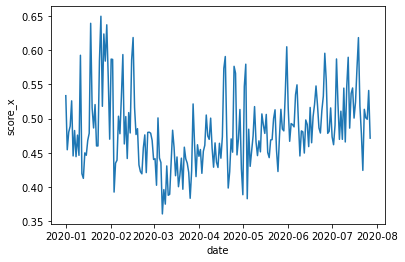

In [5]:
sns.lineplot(data = sentiment_x, x='date', y = 'score_x')

<AxesSubplot:xlabel='date', ylabel='ave_score_y'>

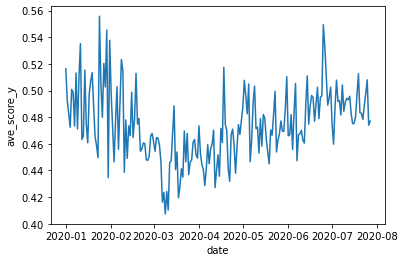

In [6]:
sns.lineplot(data = sentiment_y, x='date',y = 'ave_score_y')